In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Numerics with single population dynamics in discrete time

### Erol Akcay
Department of Biology, University of Pennsylvania

Bio 417 Spring 2019 

Let us first write a function for the logistic map

In [2]:
def logisticmap(l,x):
    return l*x*(1-x)

In [3]:
logisticmap(.6,.1)

0.054

Now let's run the logistic map for some number of iterations, and save the population history. You can play with the parameters.

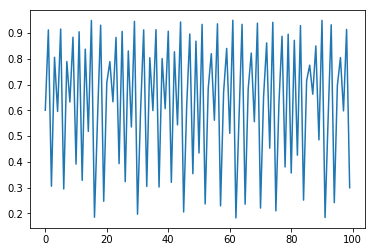

In [25]:
duration=100
pophist=np.zeros(duration)
lamb=3.8
pophist[0]=.6
for i in range(duration-1):
    pophist[i+1]=logisticmap(lamb,pophist[i])
plt.plot(pophist)

Let's do a cobweb diagram of the dynamics. We need three things: a plot of the map itself, the diagonal, and line segments that connect the diagonal to the map. 

Text(0.5, 0, '$x$')

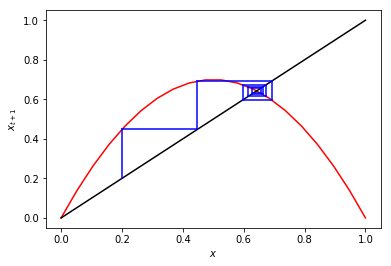

In [8]:
plt.plot(np.linspace(0,1,20),logisticmap(lamb,np.linspace(0,1,20)),"r")
plt.plot([0,1],[0,1],"black")
for i in range(9):
    plt.plot([pophist[i],pophist[i]],pophist[[i,i+1]],"b") # This draws the vertical segments
    plt.plot(pophist[[i,i+1]],[pophist[i+1],pophist[i+1]],"b") # This draws the horizontal ones
plt.ylabel("$x_{t+1}$")
plt.xlabel("$x$")

One thing to notice is that unlike the logistic equation in continuous time, where r only affects the speed of convergence to the equilibrium (provided it's positive), here $\lambda$ actually affects both convergence and the location of the equilibrium, and more, as we can see below. 

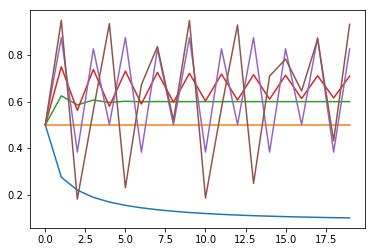

In [11]:
for j in [1.1,2,2.5,3,3.5,3.8]:
    pophist_j=np.zeros(20)
    pophist_j[0]=.5
    for i in range(19):
        pophist_j[i+1]=logisticmap(j,pophist_j[i])
    plt.plot(pophist_j)

So that's pretty interesting: as we increase $\lambda$, the location of the stable equilibrium increases first (which is as we expected) but then the stable equilibrium seems to disappear, giving way to cycles that seem to increase in period, and the last one doesn't seem to be a cycle at all. And it's not. Let's draw what's called an orbit diagram of the system, which is a plot of which points the system traverses for a particular value of $\lambda$.

Text(0.5, 0, '$\\lambda$')

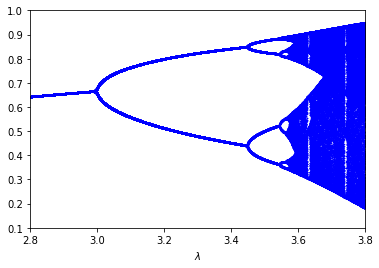

In [10]:
for j in np.arange(2.8,3.8,.001):
    pophist_j=np.zeros(300)
    dumm=0.3
    for i in range(300): #first run the population forward 300 time steps without recording the values
        dumm = logisticmap(j,dumm)
    pophist_j[0]=dumm # now let's start recording the population for 300 more time steps
    for i in range(299): 
        pophist_j[i+1]=logisticmap(j,pophist_j[i])
    plt.plot(np.full(300,j),pophist_j,"bo",markersize=.6) #plot the points the system traverses against the value of lambda
plt.ylim([.1,1])
plt.xlim([2.8,3.8])
plt.xlabel("$\lambda$")

So, what we observe is a pattern of bifurcation where we double the period of the stable cycle (starting with 1), until the cycle appears to disappear, instead the system traverses a whole lot of points without ever returning to the same point again. That's the chaos regime. Interestingly, after the system has gone to chaos, there are "periodic windows," where a stable cycle reaappears. These show up as the white strips in the orbit diagram.

Moreover, when you zoom into a region of this bifurcation plot, it looks similar to the entire plot.

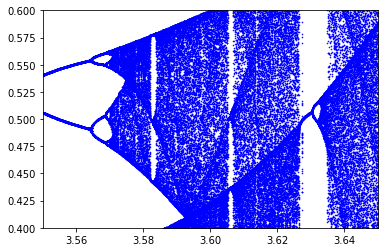

In [11]:
for j in np.arange(3.55,3.65,.0001):
    pophist_j=np.zeros(300)
    dumm=0.3
    for i in range(300): #first run the population forward 300 time steps without recording the values
        dumm = logisticmap(j,dumm)
    pophist_j[0]=dumm # now let's start recording the population for 300 more time steps
    for i in range(299): 
        pophist_j[i+1]=logisticmap(j,pophist_j[i])
    plt.plot(np.full(300,j),pophist_j,"bo",markersize=.6) #plot the points the system traverses against the value of lambda
    plt.ylim([.4,.6])
    plt.xlim([3.55,3.65])

We can also define a new recursive function to denote the logistic map applied n times.

In [18]:
def logisticmapn(l,x,n): #n is the number of applications of the map.
    if n==1:
        return logisticmap(l,x)
    else:
        return logisticmap(l,logisticmapn(l,x,n-1))

For example, we can plot the logistic map applies two times.

In [19]:
lima=0
limb=1

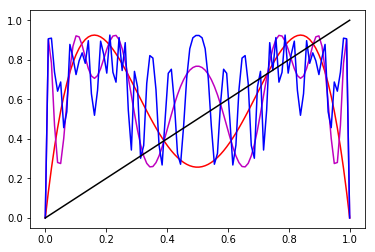

In [24]:
plt.plot(np.linspace(lima,limb,100),logisticmapn(3.7,np.linspace(lima,limb,100),2),"r")
plt.plot(np.linspace(lima,limb,100),logisticmapn(3.7,np.linspace(lima,limb,100),4),"m")
plt.plot(np.linspace(lima,limb,100),logisticmapn(3.7,np.linspace(lima,limb,100),8),"b")
plt.plot([lima,limb],[lima,limb],"black")